In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [391]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission_example.csv')

In [3]:
test.shape, train.shape

((173, 14), (333, 15))

crim :
per capita crime rate by town.

zn :
proportion of residential land zoned for lots over 25,000 sq.ft.

indus:
proportion of non-retail business acres per town.

chas:
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox:
nitrogen oxides concentration (parts per 10 million).

rm:
average number of rooms per dwelling.

age:
proportion of owner-occupied units built prior to 1940.

dis:
weighted mean of distances to five Boston employment centres.

rad:
index of accessibility to radial highways.

tax:
full-value property-tax rate per \$10,000.

ptratio:
pupil-teacher ratio by town.

black:
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat:
lower status of the population (percent).

medv:
median value of owner-occupied homes in \$1000s.

In [4]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


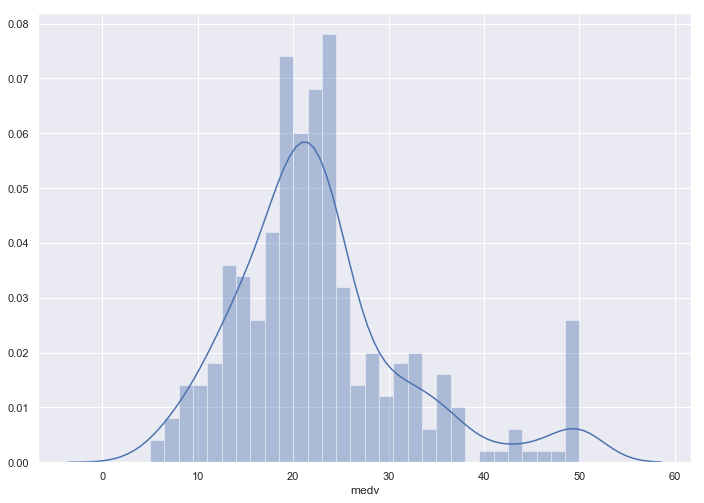

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train['medv'], bins=30)
plt.show()

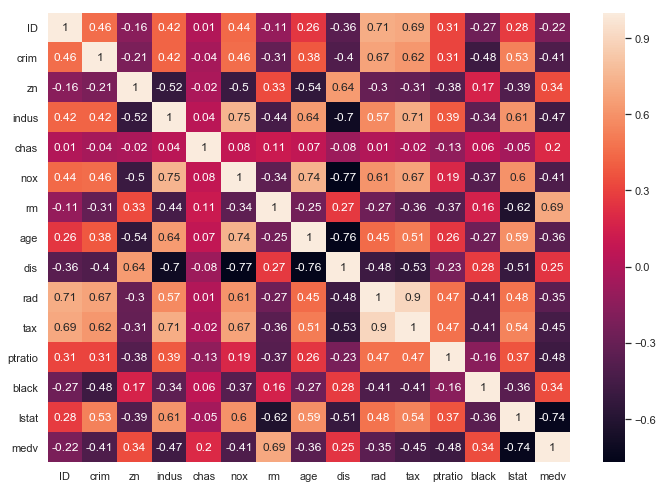

In [6]:
correlation_matrix = train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
train.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [100]:
train.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [433]:
columns = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']
train[columns].corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251
tax,0.617081,-0.311180,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,-0.406477,0.544485,-0.448078


In [122]:
X = train[['crim', 'zn', 'indus','chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']]
Y = train['medv']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, pred_y))


model.score(X_test, Y_test), model.score(X_train,Y_train), rmse

(0.6729580005099426, 0.7415102034268817, 4.80659532282002)

In [133]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01       )
rr.fit(X_train, Y_train)
pred_y_rr = rr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, pred_y_rr))

rr.score(X_test, Y_test), rr.score(X_train, Y_train), rmse

(0.6727561392197741, 0.7415092292119945, 4.808078489906781)

In [147]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X=scaler.transform(X)
rr =Ridge(alpha=0.001)
scaled_X_train, scaled_X_test, scaled_Y_train, scaled_Y_test = train_test_split(scaled_X, Y,random_state=1)
rr.fit(scaled_X_train, scaled_Y_train)
pred_scaled_Y = rr.predict(scaled_X_test) 
rmse= np.sqrt(mean_squared_error(scaled_Y_test, pred_scaled_Y))

rr.score(scaled_X_test,scaled_Y_test),rr.score(scaled_X_train,scaled_Y_train),rmse

c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.689437493674063, 0.7395708923563926, 4.57683336378089)

In [150]:
model.fit(scaled_X_train, scaled_Y_train)
pred_scaled_Y = model.predict(scaled_X_test)
rmse = np.sqrt(mean_squared_error(scaled_Y_test, pred_scaled_Y))
model.score(scaled_X_test, scaled_Y_test), model.score(scaled_X_train, scaled_Y_train), rmse

(0.6894376146826722, 0.7395708924028579, 4.576832472114507)

In [120]:
from sklearn.linear_model import Lasso

rr = Ridge(alpha=0.01, normalize=True, max_iter = 10
          )
rr.fit(X_train, Y_train)
pred_y_rr = rr.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, pred_y_rr))

rr.score(X_test, Y_test), rr.score(X_train, Y_train), rmse

In [166]:
ls = Lasso(alpha=0.0001)
ls.fit(scaled_X_train, scaled_Y_train)
pred_y_ls = ls.predict(scaled_X_test)
rmse=np.sqrt(mean_squared_error(scaled_Y_test, pred_y_ls))

ls.score(scaled_X_test, scaled_Y_test), ls.score(scaled_X_train, scaled_Y_train), rmse

(0.6894298559397871, 0.7395708855224756, 4.576889642986242)

In [168]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [173]:
train[['chas','medv']].corr()

,chas,medv
chas,1.00000,0.20439
medv,0.20439,1.00000


In [174]:
train.medv.describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

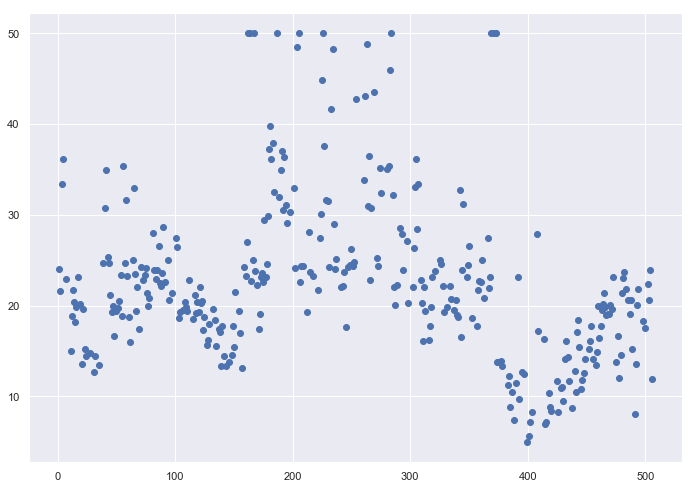

In [182]:
plt.scatter(train.ID,train.medv)

In [208]:
train['medv_dummy'] = train[['medv']] >= train.medv.median() 
train[['chas','medv_dummy']].corr()

,chas,medv_dummy
chas,1.00000,0.15091
medv_dummy,0.15091,1.00000


In [231]:
train[['chas','medv_dummy']].groupby(by='chas')

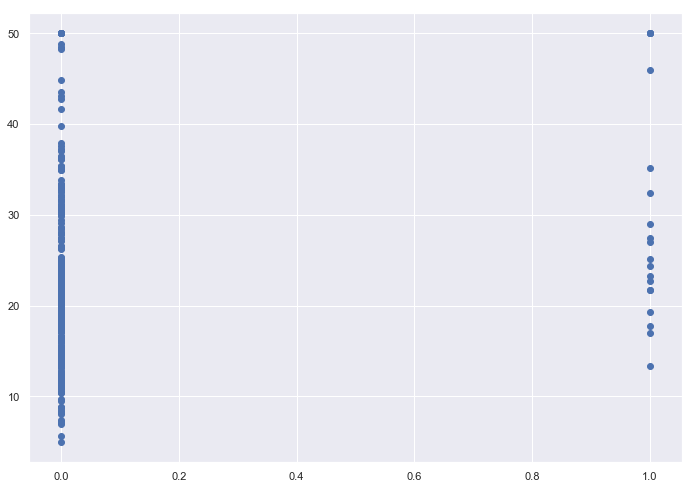

In [273]:

plt.scatter(train['chas'], train['medv'],)

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

columns = ['crim', 'zn', 'indus','chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']
X = train[columns]
Y = train['medv']


model = Lasso(alpha = 0.1)

X = scaler.fit_transform(X)


model.fit(X, Y)

model.score(X,Y), 


c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ajy\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: y_true and y_pred have different number of output (13!=1)

In [394]:
test = test[columns].head()

In [389]:

test=scaler.fit_transform(test)


In [386]:
pred= model.predict(test)
sub['medv'] = pred

In [407]:
sub.to_csv('C:/Users/ajy/kaggle/BostonHousing/BostonHousing_sub',index=False,)



In [403]:
sub.shape

(173, 2)

In [408]:
pd.read_csv('BostonHousing_sub')

,ID,medv
0,3,22.768769
1,6,22.768769
2,8,22.768769
3,9,22.768769
4,10,22.768769
5,18,22.768769
6,20,22.768769
7,25,22.768769
8,26,22.768769
9,27,22.768769
